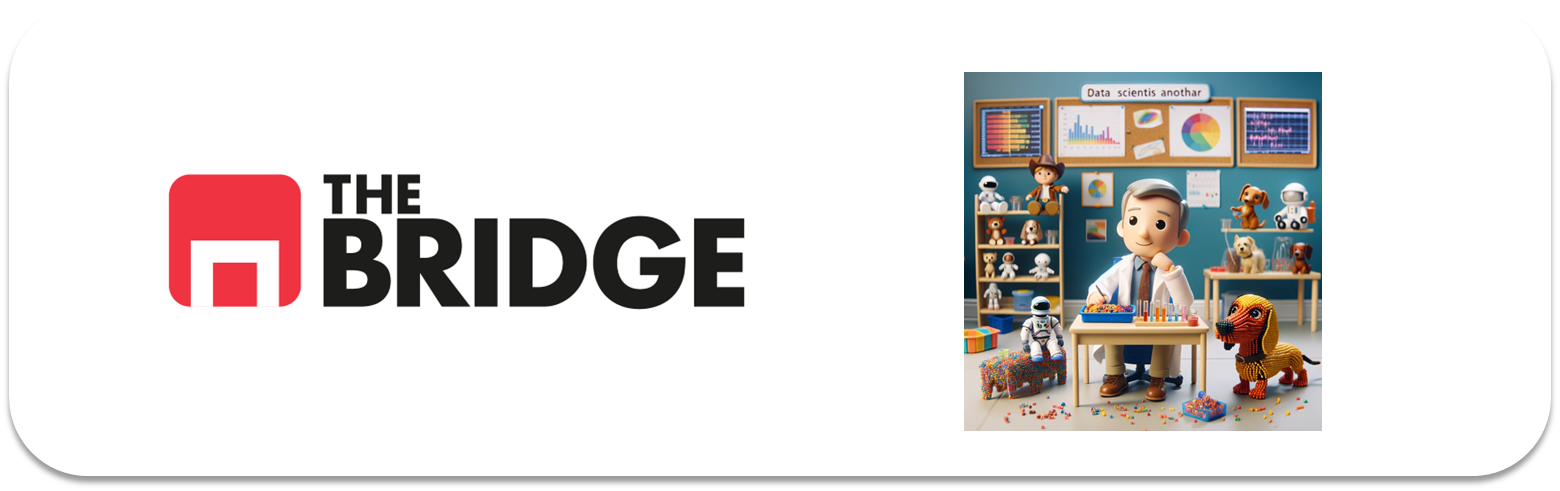

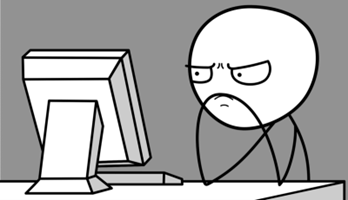

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep = "|")
df_cars.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehñculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)

* "speeding" -  acidentes causada por un exceso de velocidad
* "alcohol" - acidentes causadas por consumicion de alcohol
* "not_distracted" - acidentes donde el conductor dice que no ha sido distraido
* "no_previous" - no han presentado ningun parte anteriormente
* "abbrev" - puede ser el abreviacion del estado

### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [4]:
pct_cols = ["speeding","alcohol","not_distracted","no_previous"]

In [5]:
for col in pct_cols:
    df_cars[col+"_abs"] = df_cars[col]*df_cars["total"]
    

In [6]:
df_cars[["speeding_abs","alcohol_abs","not_distracted_abs","no_previous_abs"]].describe().T

,count,mean,std,min,25%,50%,75%,max
speeding_abs,51.0,83.909102,49.059831,11.8354,48.06360,68.4352,118.87880,217.0598
alcohol_abs,51.0,83.121118,49.507659,9.3987,48.40990,69.1488,104.00760,239.9082
not_distracted_abs,51.0,229.402576,129.111280,30.9760,124.05360,206.4693,300.81575,565.4979
no_previous_abs,51.0,235.686873,116.510959,34.8100,150.26985,217.7364,308.88125,492.8028


In [7]:
df_cars.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,speeding_abs,alcohol_abs,not_distracted_abs,no_previous_abs
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,137.8416,106.0320,339.3024,282.7520
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,134.3201,81.9025,294.8490,307.9534
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,121.0860,96.8688,290.6064,332.1216
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,90.3168,130.4576,471.6544,476.6720
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,50.4000,40.3200,131.0400,128.1600


### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

In [8]:
df_cars = df_cars.rename(columns={"abbrev":"state"})

In [9]:
df_cars

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,speeding_abs,alcohol_abs,not_distracted_abs,no_previous_abs
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,137.8416,106.0320,339.3024,282.7520
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,134.3201,81.9025,294.8490,307.9534
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,121.0860,96.8688,290.6064,332.1216
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,90.3168,130.4576,471.6544,476.6720
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,50.4000,40.3200,131.0400,128.1600
5,5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,68.4352,51.7888,146.1184,175.7120
6,6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,53.6544,41.9904,101.4768,95.6448
7,7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,99.7272,78.7320,228.3228,259.8156
8,8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,11.8354,9.3987,34.8100,34.8100
9,9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,67.2861,92.9189,294.7772,301.1854


In [10]:
df_cars_abs = df_cars[["speeding_abs","alcohol_abs","not_distracted_abs","no_previous_abs"]]

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

In [11]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [12]:
variabilidad(df_cars_abs)

,std,mean,CV
speeding_abs,49.059831,83.909102,0.584678
alcohol_abs,49.507659,83.121118,0.595609
not_distracted_abs,129.111280,229.402576,0.562815
no_previous_abs,116.510959,235.686873,0.494346


### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [13]:
from bootcampviztools import plot_combined_graphs

(2,)


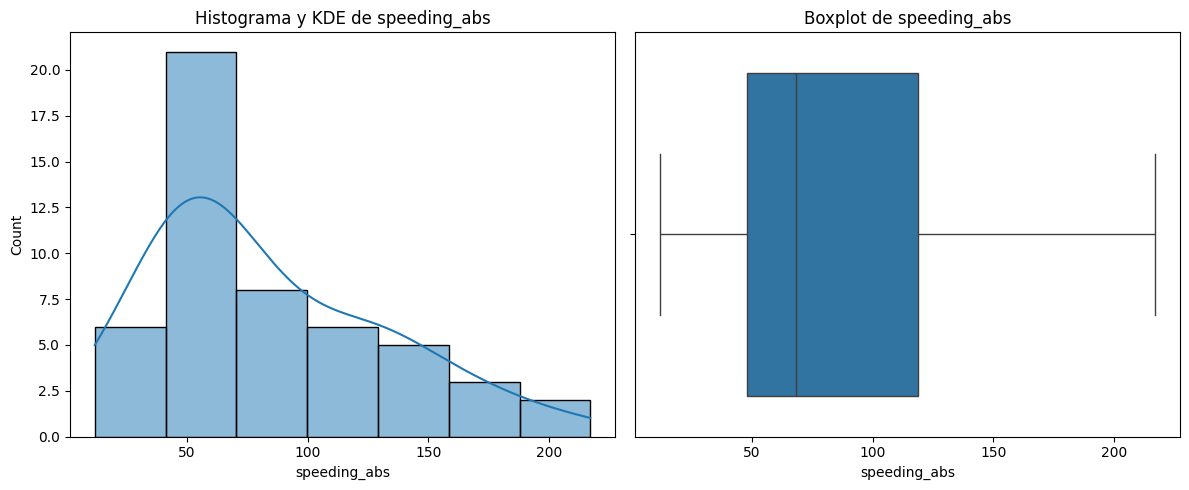

In [14]:
plot_combined_graphs(df_cars,["speeding_abs"] )

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


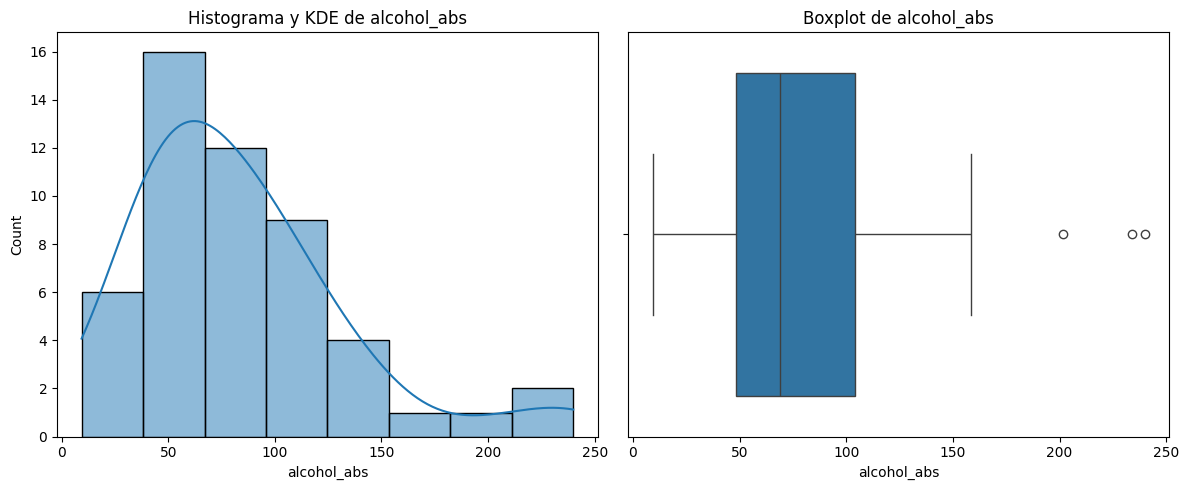

In [15]:
plot_combined_graphs(df_cars,["alcohol_abs"])

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


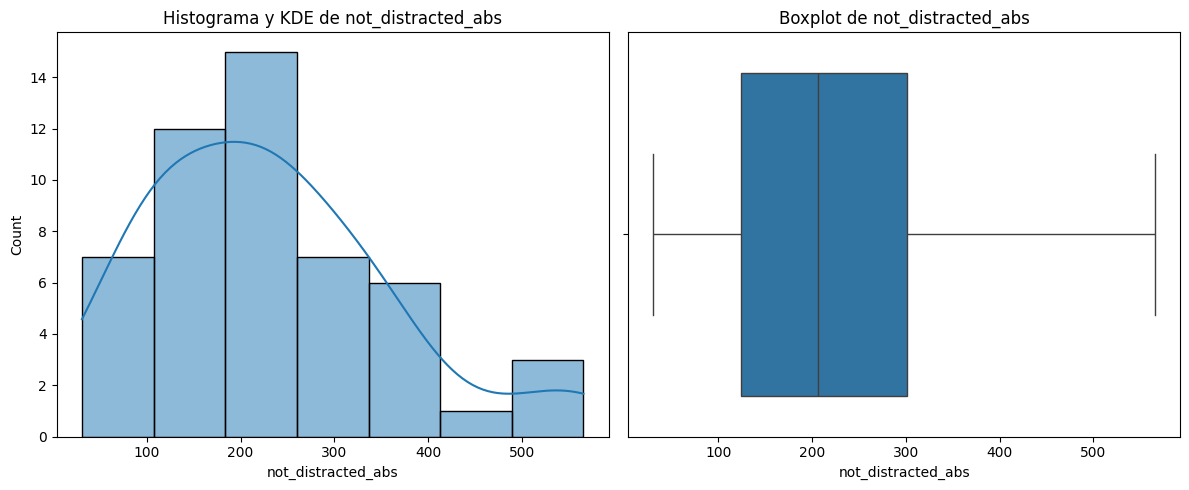

In [16]:
plot_combined_graphs(df_cars,["not_distracted_abs"])

### Ejercicio 8

El diagrma de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

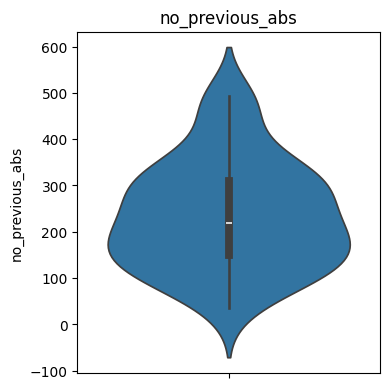

In [17]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df_cars, ["no_previous_abs"])

(2,)


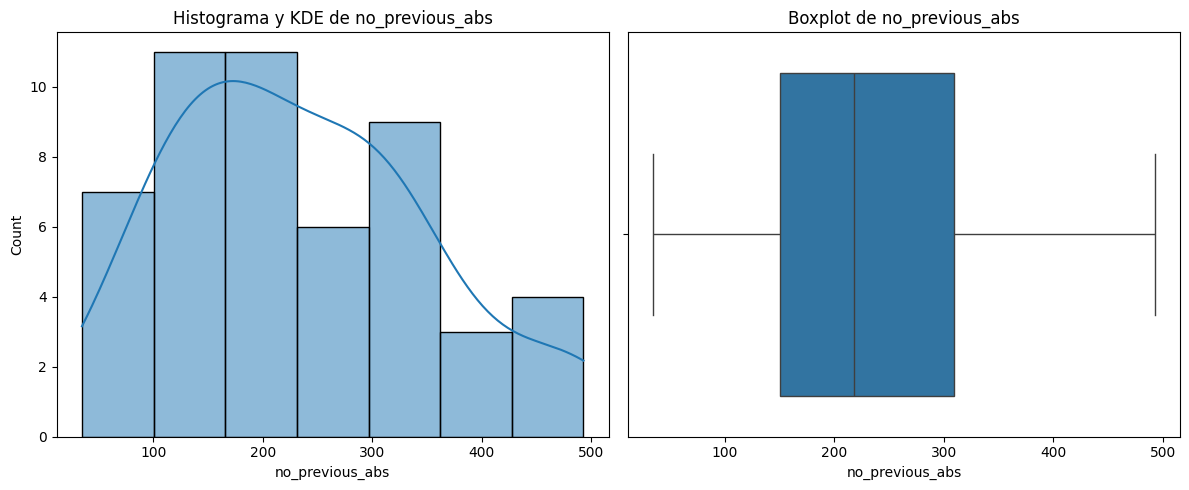

In [18]:
plot_combined_graphs(df_cars,["no_previous_abs"])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

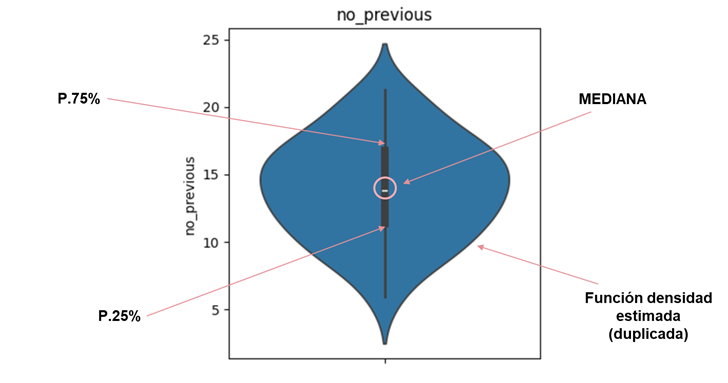

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

In [19]:
variabilidad(df_cars["no_previous_abs"])

std     116.510959
mean    235.686873
CV        0.494346
Name: no_previous_abs, dtype: float64

In [20]:
df_cars["no_previous_abs"].describe()

count     51.000000
mean     235.686873
std      116.510959
min       34.810000
25%      150.269850
50%      217.736400
75%      308.881250
max      492.802800
Name: no_previous_abs, dtype: float64

In [21]:
df_cars["no_previous_abs"].mode()

0    175.712
Name: no_previous_abs, dtype: float64

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [22]:
df = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(2,)


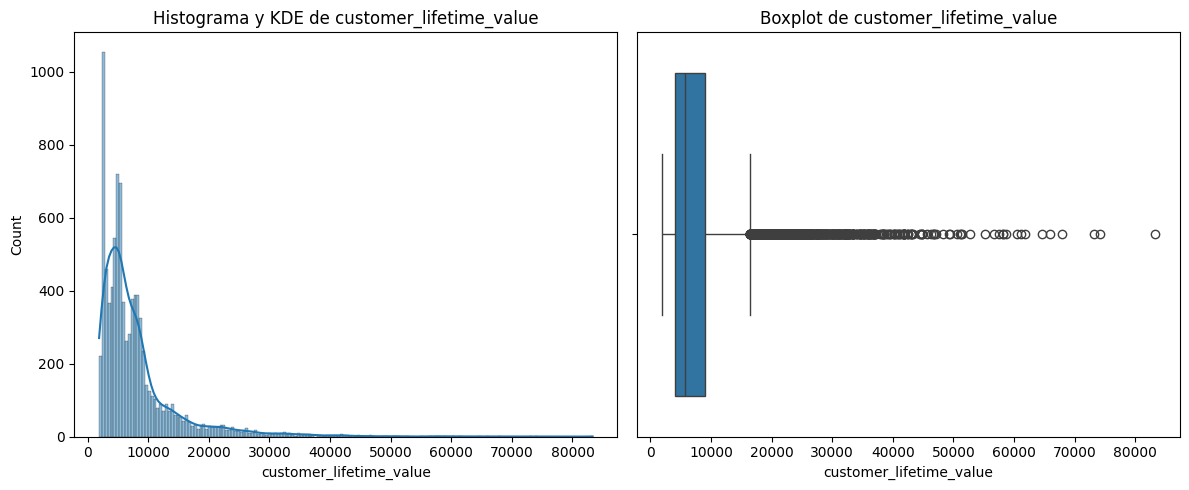

In [23]:
plot_combined_graphs(df,["customer_lifetime_value"])

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

In [25]:
umbral = 10000
df_outliers = df[df["customer_lifetime_value"]> umbral]
df_in = df[df["customer_lifetime_value"]<= umbral]

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?

(2,)


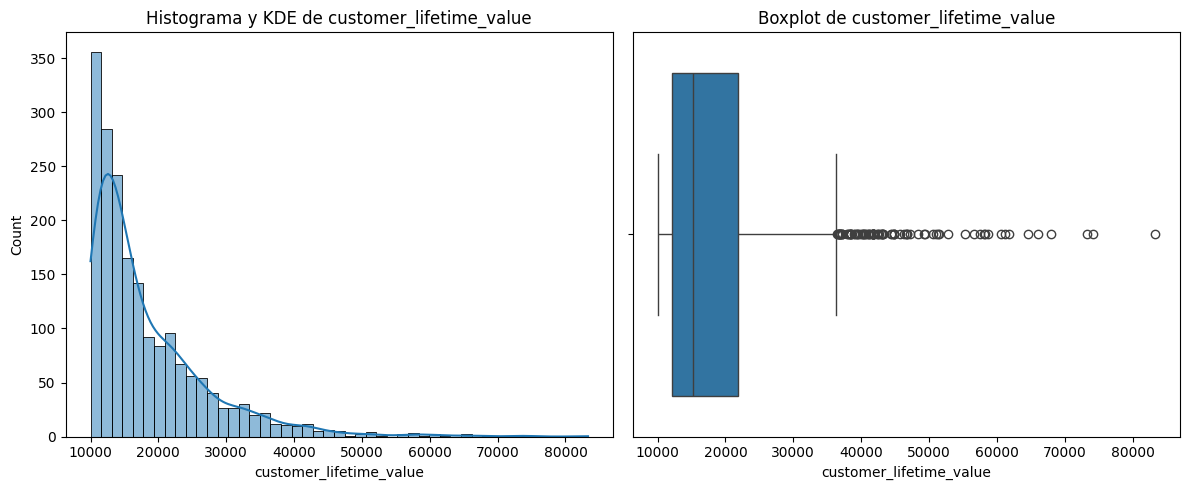

In [28]:
plot_combined_graphs(df_outliers,["customer_lifetime_value"])

(2,)


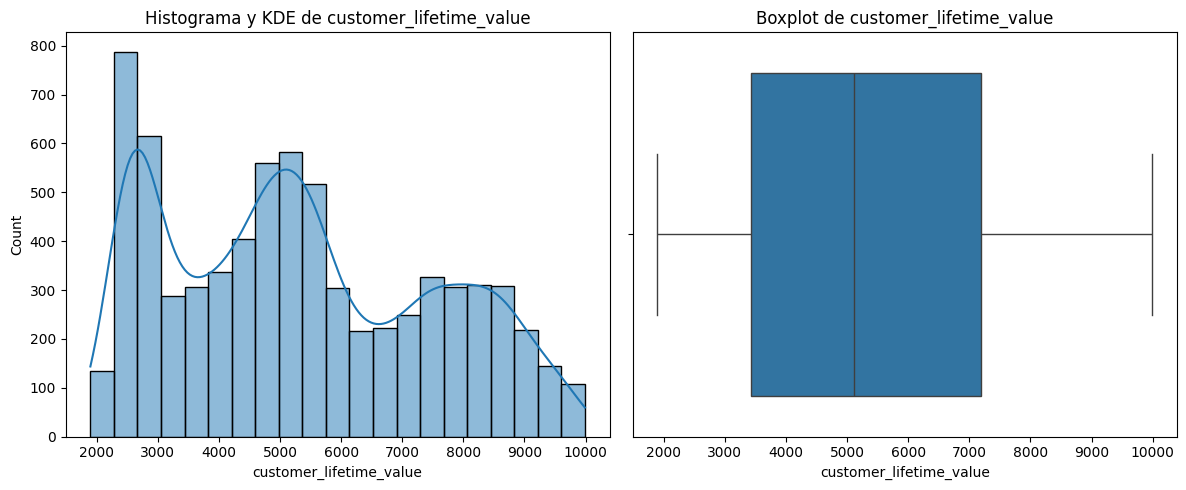

In [29]:
plot_combined_graphs(df_in,["customer_lifetime_value"])